In [ ]:
'''
DESCRIPTION:=========================================================================================================

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. 
These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. 
Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. 
Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the 
customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have 
developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on 
Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex 
and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different 
permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute 
to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
Check for null and unique values for test and train sets.
Apply label encoder.
Perform dimensionality reduction.
Predict your test_df values using XGBoost.
'''

In [100]:
#importing Mercedes-Benz dataset
import pandas as pd
merc_train_df=pd.read_csv("E:/Education/PGP Simplilearn-Purdue/PGP in Data Science/Machine Learning/Machine-Learning--Projects-master/Projects/Projects for Submission/Project 1 - Mercedes-Benz Greener Manufacturing/Dataset for the project/train.csv")
merc_test_df=pd.read_csv("E:/Education/PGP Simplilearn-Purdue/PGP in Data Science/Machine Learning/Machine-Learning--Projects-master/Projects/Projects for Submission/Project 1 - Mercedes-Benz Greener Manufacturing/Dataset for the project/test.csv")

In [101]:
#Exploring train and test dataset
merc_train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [102]:
merc_test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [103]:
print(merc_train_df.shape)
print(merc_test_df.shape)

(4209, 378)
(4209, 377)


In [104]:
merc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [105]:
merc_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [106]:
merc_train_df.describe()
#Observation:
#Maximum value of y-variable is 265.32 which is far greater than its mean(100.66) and median(99.15)=> It might be an outlier

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
#If for any column(s), the variance is equal to zero, then you need to remove those variable(s)
zero_var_col=[]
for col in merc_train_df.columns[merc_train_df.dtypes!='object']:
    if(merc_train_df[col].var()==0):
        zero_var_col.append(col)
zero_var_col
#Observation:
#12 columns have zero variance and hence are not useful in predicting target variable

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [108]:
#Dropping 'y' variable from train set
y_train=merc_train_df.y
merc_train_df.drop(['y'],axis=1,inplace=True)
merc_train_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,6,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,7,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,9,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,13,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
#Concatenating train and test sets
merc_df=pd.concat([merc_train_df,merc_test_df],ignore_index=True)
merc_df

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,6,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,7,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,9,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,13,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8413,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
8414,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
8415,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
8416,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


In [110]:
#Dropping zero variance columns from train and test datasets
merc_df.drop(zero_var_col,axis=1,inplace=True)
merc_df.shape
#12 un-useful features have been dropped from train and test sets

(8418, 365)

In [111]:
#Check for null values in test and train sets
null_cols=[]
for col in merc_df:
    if(merc_df[col].isna().sum()>0):
        null_cols.append(col)
null_cols
#Observation:
#No null values are present

[]

In [156]:
#Check for unique values in test and train sets for categorical variables
#Unique values for train set
print("Training Dataset")
print("Column"," ","Unique Values")
total_unique=0
for col in merc_train_df.columns[1:9]:
    print(col,"       ",len(merc_train_df[col].unique()))
    total_unique+=len(merc_train_df[col].unique())
print("Total:",total_unique)

#Unique values for test set
total_unique=0
print("Testing Dataset")
print("Column"," ","Unique Values")
for col in merc_test_df.columns[1:9]:
    print(col,"       ",len(merc_test_df[col].unique()))
    total_unique+=len(merc_test_df[col].unique())
print("Total:",total_unique)
#Observations:
#Unique vales in test set is higher for X0,X2 and X5 and remains same for other columns
#Test set has 6 more unique values in total compared to train set

Training Dataset
Column   Unique Values
X0         47
X1         27
X2         44
X3         7
X4         4
X5         29
X6         12
X8         25
Total: 195
Testing Dataset
Column   Unique Values
X0         49
X1         27
X2         45
X3         7
X4         4
X5         32
X6         12
X8         25
Total: 201


Text(0, 0.5, 'Testing Time (seconds)')

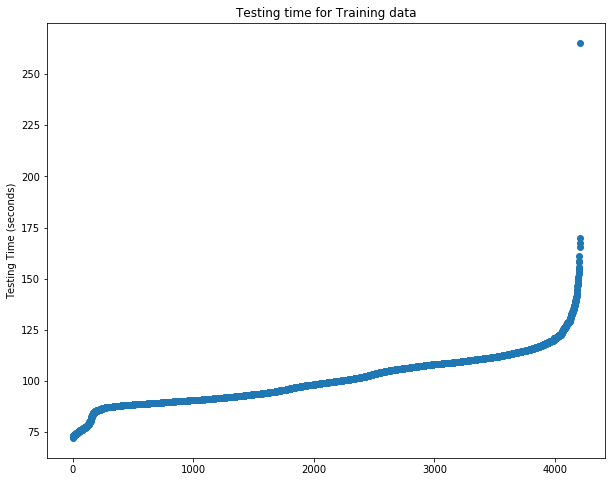

In [126]:
#Visual Data Exploration
import matplotlib.pyplot as plt
import seaborn as sns

#Visualizing the target variable
y_train_sort=y_train.sort_values(ascending=True).reset_index(drop=True)
plt.figure(figsize=(10,8))
plt.scatter(y_train_sort.index,y_train_sort)
plt.title("Testing time for Training data")
plt.ylabel("Testing Time (seconds)")
#Observation:
#As observed earler in our statistical analysis, Target variable has an obvious outlier at ~265 sec

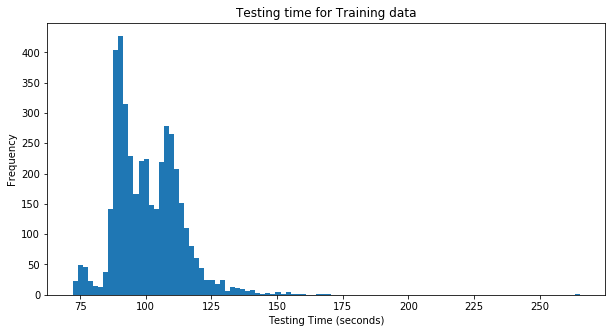

In [127]:
#Plotting histogram for target variable to see the distribution
plt.figure(figsize=(10,5))
plt.hist(y_train,bins=100)
plt.title("Testing time for Training data")
plt.xlabel("Testing Time (seconds)")
plt.ylabel("Frequency")
plt.show()
#Observations:
#Target variable distribution is right-skewed
#Majority of the tests are in the duration between 90-100 seconds
#There are 2 peak values, one near to 90 seconds and another near 110 seconds
#It would be better to remove the outlier value from the dataset to avoid adverse impact on our model

In [140]:
#Dropping the outlier from the dataset
merc_df.drop(index=y_train.index[y_train>250],inplace=True)
y_train.drop(index=y_train.index[y_train>250],inplace=True)
#index=883 has been removed

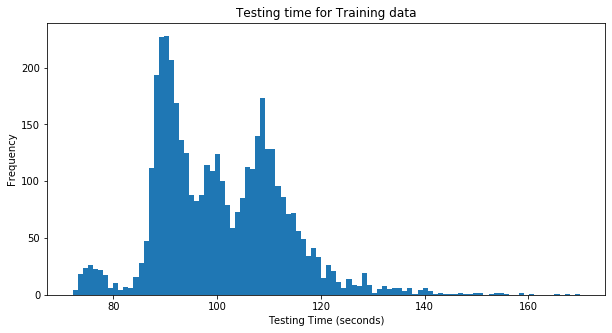

In [144]:
#Plotting histogram for target variable to see the distribution after outlier removal
plt.figure(figsize=(10,5))
plt.hist(y_train,bins=100)
plt.title("Testing time for Training data")
plt.xlabel("Testing Time (seconds)")
plt.ylabel("Frequency")
plt.show()

In [165]:
#Encoding categorical variables
#Passing categorical columns into  variable
cat_var=merc_df.columns[merc_df.dtypes=='object']

#One-hot encoding
for c in cat_var:
    dummy_cat=pd.get_dummies(merc_df[c],prefix=c)
    for d in dummy_cat:
        merc_df[d]=dummy_cat[d]

In [172]:
#Dropping ID and categorical variables from the dataset
merc_df.drop(cat_var,axis=1,inplace=True)
merc_df.drop(['ID'],axis=1,inplace=True)

In [182]:
#Separating train and test sets
x_train=merc_df[:len(y_train)]
x_test=merc_df[len(y_train):]
y_train=pd.DataFrame(y_train)

In [186]:
#Applying PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [198]:
#Dimensions capturing 95% of variance after applying PCA
print("Train set dimensions:",len(x_train_pca[0]))
print("Test set dimensions:",len(x_test_pca[0]))
#Observation:
#Total of 136 dimensions capture 95% of variance in the dataset
#Dimensions have reduced from 567 to 136 (~76% reduction) after applying PCA

Train set dimensions: 136
Test set dimensions: 136


In [279]:
#Building XGBoost model
import xgboost as xgb
D_train=xgb.DMatrix(x_train,label=y_train)
D_test=xgb.DMatrix(x_test)

In [339]:
##Creating parameters for xgboost--initializing parameters
param={
    #'n_trees':600,
    'eta':0.1,
    'max_depth':5,
    'objective':'reg:squarederror',
    'subsample':0.95,
    'colsample_bytree':0.5,
    #'base_score':np.mean(y_train),
    'alpha':10
}

In [340]:
#Training xgboost model
merc_xgboost_model=xgb.train(param,D_train,50)

In [341]:
#Predictions
y_pred=merc_xgboost_model.predict(D_test)
y_pred

array([ 79.34766 ,  94.07286 ,  79.43733 , ...,  94.11497 , 109.95334 ,
        91.684555], dtype=float32)

In [342]:
#Model Evaluation
import numpy as np
from sklearn import metrics
print("Accuracy Score:",metrics.r2_score(y_train,merc_xgboost_model.predict(xgb.DMatrix(x_train))))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train,merc_xgboost_model.predict(xgb.DMatrix(x_train)))))
#Observation:
#Accuracy on training data:64.75%
#RMSE for training data: 7.37

Accuracy Score: 0.6407487683137433
RMSE: 7.445846417081999


In [284]:
#Cross validation
cv_results = xgb.cv(dtrain=D_train, params=param, nfold=3,
                    num_boost_round=100,early_stopping_rounds=10,metrics='rmse', as_pandas=True, seed=10)

In [285]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,90.889196,0.112571,90.889043,0.236046
1,81.901873,0.103752,81.902633,0.233796
2,73.817182,0.101009,73.814143,0.224254
3,66.555046,0.098087,66.561979,0.214195
4,60.027640,0.099578,60.025926,0.203067
5,54.151263,0.093632,54.148634,0.202268
6,48.881036,0.087589,48.884778,0.207700
7,44.152088,0.084830,44.163198,0.210389
8,39.901666,0.079885,39.909340,0.210834
9,36.097010,0.082179,36.098763,0.212224


In [331]:
#Output--ID and Predicted time
merc_pred=pd.concat([merc_test_df['ID'],pd.DataFrame(y_pred,columns=['y'])],axis=1)
merc_pred

,ID,y
0,1,78.066551
1,2,93.024879
2,3,78.518097
3,4,77.746162
4,5,111.762001
...,...,...
4204,8410,101.911461
4205,8411,93.752846
4206,8413,93.795135
4207,8414,110.168396


In [332]:
#Loading output to a csv file
merc_pred.to_csv(r'E:/Education/PGP Simplilearn-Purdue/PGP in Data Science/Machine Learning/Machine-Learning--Projects-master/Projects/Projects for Submission/Project 1 - Mercedes-Benz Greener Manufacturing/Dataset for the project/Praveen_Merc_Submission_4.csv',index=False)